In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-48.689224125694054 10.670618108049979
62.33790176739788 88.43338650113233
-66.8007802274231 34.41304826751869
43.95812193743993 73.51095095741937
-17.600859476203084 -33.98374159184658
76.8468953305262 -49.273345797482165
-6.45895246019316 61.74081360847046
-56.88722925546155 -76.46037977052885
21.37498511631989 33.30735704158111
56.5416492065024 2.3242209179554862
11.164488506340192 -39.428395626342734
74.19378853577183 -40.622998276716004
-51.53643349401498 31.690170580537455
14.001881537912539 -31.053328680996337
-72.01321058309551 15.417936043293082
-18.36818814080283 -3.8402041643432057
-24.44463019676236 43.81710446504073
-17.40850102972479 63.275868932954495
43.0768332990375 -18.621167827040466
-30.976816669329132 87.00727616403259
79.44587712492643 -31.34720263920444
22.71951815931959 -51.659796811545306
19.644597991518722 28.096761958795895
32.1427205915231 -67.88082213621648
45.58853232231351 52.337944248421195
28.466391028871925 89.80063301976818
51.35914006101433 31.486854

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hermanus za
turukhansk ru
port elizabeth za
shu kz
santa cruz cabralia br
ilulissat gl
victoria sc
punta arenas cl
aswan eg
bridlington gb
carutapera br
tasiilaq gl
port alfred za
sao filipe cv
bredasdorp za
jamestown sh
betioky mg
quatre cocos mu
vila franca do campo pt
carnarvon au
illoqqortoormiut gl
codrington ag
marawi sd
hamilton bm
karaton kz
gasa bt
kulykivka ua
muros es
leh in
taolanaro mg
coquimbo cl
kunjah pk
illoqqortoormiut gl
amderma ru
tabou ci
ushuaia ar
ribeira grande pt
ushuaia ar
albanel ca
wangdiphodrang bt
kaduna ng
villazon bo
longyearbyen sj
plettenberg bay za
tabuk sa
coquimbo cl
qaanaaq gl
bako et
xuddur so
cidreira br
georgetown sh
rio grande br
santa lucia es
ushuaia ar
richards bay za
jamestown sh
hithadhoo mv
cidreira br
cidreira br
garowe so
kintampo gh
barentsburg sj
castro cl
touros br
illoqqortoormiut gl
chicama pe
ushuaia ar
bredasdorp za
hofn is
aguada de pasajeros cu
cape town za
moose factory ca
samara ru
belushya guba ru
mahebourg mu
sao joao da ba

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 82.54,
  'feels_like': 85.03,
  'temp_min': 76.21,
  'temp_max': 86.41,
  'pressure': 1015,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 14.97, 'deg': 190},
 'clouds': {'all': 75},
 'dt': 1658100355,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1658049737,
  'sunset': 1658103485},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Get the JSON data.
boston_data = city_weather.json()

In [13]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1658049737,
 'sunset': 1658103485}

In [14]:
boston_data['sys']["country"]

'US'

In [15]:
boston_data["dt"]

1658100355

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 86.41 59 75 14.97


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 7, 17, 23, 25, 55)

In [18]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-17 23:25:55'

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | turukhansk
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | shu
Processing Record 5 of Set 1 | santa cruz cabralia
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | aswan
Processing Record 10 of Set 1 | bridlington
Processing Record 11 of Set 1 | carutapera
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | betioky
Processing Record 18 of Set 1 | quatre cocos
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Process

In [21]:
len(city_data)

574

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,49.80,82,0,7.27,ZA,2022-07-17 23:28:05
1,Turukhansk,65.8167,87.9833,55.62,65,35,10.47,RU,2022-07-17 23:28:06
2,Port Elizabeth,-33.9180,25.5701,72.10,34,0,8.05,ZA,2022-07-17 23:28:06
3,Shu,43.5983,73.7614,73.47,42,0,6.17,KZ,2022-07-17 23:28:06
4,Santa Cruz Cabralia,-16.2781,-39.0247,71.83,94,75,2.30,BR,2022-07-17 23:28:07
5,Ilulissat,69.2167,-51.1000,51.82,54,26,5.75,GL,2022-07-17 23:28:07
6,Victoria,22.2855,114.1577,87.96,82,100,10.00,HK,2022-07-17 23:26:35
7,Punta Arenas,-53.1500,-70.9167,33.91,86,0,32.21,CL,2022-07-17 23:25:06
8,Aswan,24.0934,32.9070,86.56,21,92,10.45,EG,2022-07-17 23:28:08
9,Bridlington,54.0831,-0.1919,74.89,55,100,9.62,GB,2022-07-17 23:28:08


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-07-17 23:28:05,-34.4187,19.2345,49.80,82,0,7.27
1,Turukhansk,RU,2022-07-17 23:28:06,65.8167,87.9833,55.62,65,35,10.47
2,Port Elizabeth,ZA,2022-07-17 23:28:06,-33.9180,25.5701,72.10,34,0,8.05
3,Shu,KZ,2022-07-17 23:28:06,43.5983,73.7614,73.47,42,0,6.17
4,Santa Cruz Cabralia,BR,2022-07-17 23:28:07,-16.2781,-39.0247,71.83,94,75,2.30
5,Ilulissat,GL,2022-07-17 23:28:07,69.2167,-51.1000,51.82,54,26,5.75
6,Victoria,HK,2022-07-17 23:26:35,22.2855,114.1577,87.96,82,100,10.00
7,Punta Arenas,CL,2022-07-17 23:25:06,-53.1500,-70.9167,33.91,86,0,32.21
8,Aswan,EG,2022-07-17 23:28:08,24.0934,32.9070,86.56,21,92,10.45
9,Bridlington,GB,2022-07-17 23:28:08,54.0831,-0.1919,74.89,55,100,9.62


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

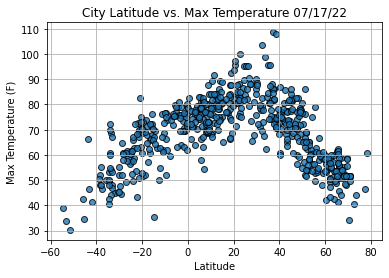

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

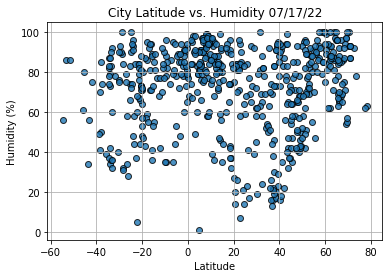

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

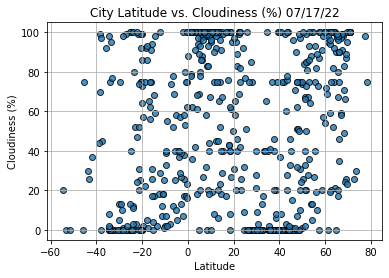

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

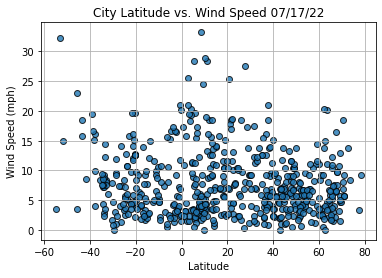

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                   Sao Filipe
Country                        CV
Date          2022-07-17 23:28:09
Lat                       14.8961
Lng                      -24.4956
Max Temp                    74.89
Humidity                       80
Cloudiness                     29
Wind Speed                  13.98
Name: 13, dtype: object

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Turukhansk,RU,2022-07-17 23:28:06,65.8167,87.9833,55.62,65,35,10.47
3,Shu,KZ,2022-07-17 23:28:06,43.5983,73.7614,73.47,42,0,6.17
5,Ilulissat,GL,2022-07-17 23:28:07,69.2167,-51.1000,51.82,54,26,5.75
6,Victoria,HK,2022-07-17 23:26:35,22.2855,114.1577,87.96,82,100,10.00
8,Aswan,EG,2022-07-17 23:28:08,24.0934,32.9070,86.56,21,92,10.45


In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

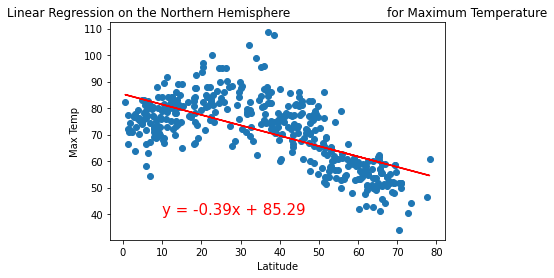

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

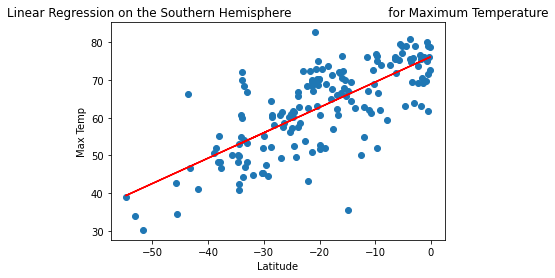

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

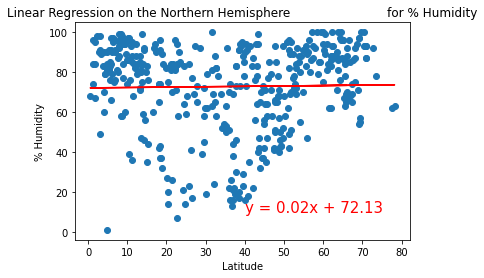

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

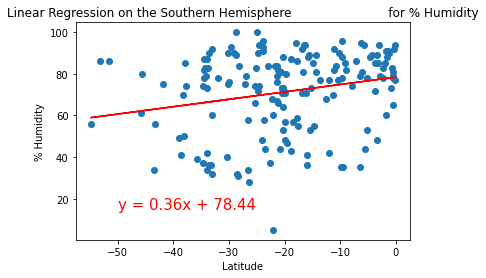

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

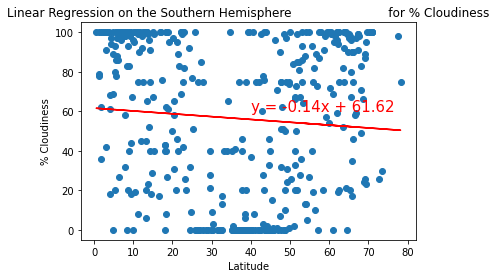

In [38]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,60))

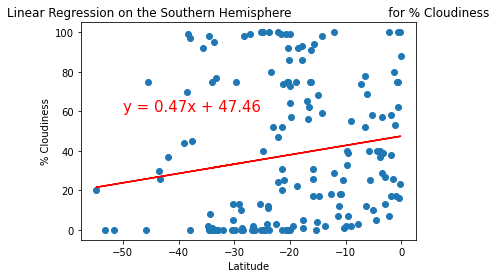

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

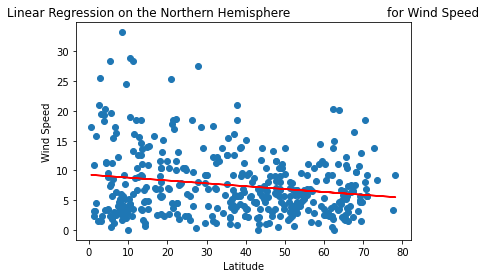

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

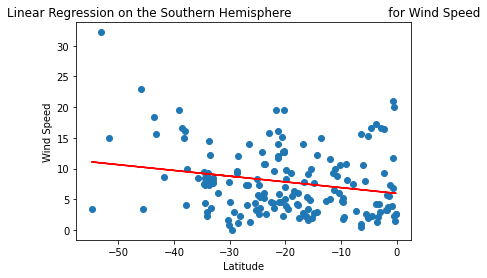

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [42]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [43]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hermanus,ZA,2022-07-17 23:28:05,-34.4187,19.2345,49.80,82,0,7.27
1,1,Turukhansk,RU,2022-07-17 23:28:06,65.8167,87.9833,55.62,65,35,10.47
2,2,Port Elizabeth,ZA,2022-07-17 23:28:06,-33.9180,25.5701,72.10,34,0,8.05
3,3,Shu,KZ,2022-07-17 23:28:06,43.5983,73.7614,73.47,42,0,6.17
4,4,Santa Cruz Cabralia,BR,2022-07-17 23:28:07,-16.2781,-39.0247,71.83,94,75,2.30


In [44]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [45]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [48]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [49]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))